In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [23]:
plt.rcParams["font.family"] = "arial"
def make_fig(xtitle="",ytitle=""):
    fig = plt.figure(figsize=(15,10))
    ax = plt.gca()
    #ax.set_prop_cycle(color=['#59FF00','#1CFFE0','#0097FF','#002BFF','#A15FFF','#FF0061','#FF8913'])
    ax.set_xlabel(xtitle,fontsize=26,labelpad=6)
    ax.set_ylabel(ytitle,fontsize=26)
    ax.tick_params(labelsize=18, direction='out', length=8, width=2)
    ax.yaxis.offsetText.set_fontsize(18)
    return fig, ax

# Lifetime of a Boosted Particle

A muon has a mean lifetime of 2.196 microseconds. This means that an unboosted muon would only travel 3x10^8 x 2.196 x 10^-6 = 660 meters. With such a short lifetime, cosmic ray muons in the upper atmosphere, many kilometers above earth's surface, would hardly reach earth's surface! How then are we able to detect cosmic ray muons? 

The answer is time dilation. Many of you have probably taken a course in special relativity so we won't go into all the details, but as a quick refresher an object's lifetime depends on its speed. As an object moves faster and faster, it's lifetime elongates. The formula for time dilation is given in code in the box below and can be found here: https://en.wikipedia.org/wiki/Special_relativity. 

In [43]:
c = 3*10**8
def time_dilation(dt, dx, beta):
    gamma = 1./np.sqrt(1-beta**2)
    return gamma * ( dt - beta/c * dx )

The plot below shows the muon lifetime as a function of the boost factor beta. As the muon reaches closer to the speed of light, beta closer to 1, its lifetime dramatically increases! Importantly, this means that the muon can travel further before decaying. The second plot below converts the y values from lifetime in microseconds to distance traveled in kilometers. 

While boosted muons are able to travel hundreds of kilometers, highly boosted muons are able to travel thousands! Because of this we can observe them in the lab! 

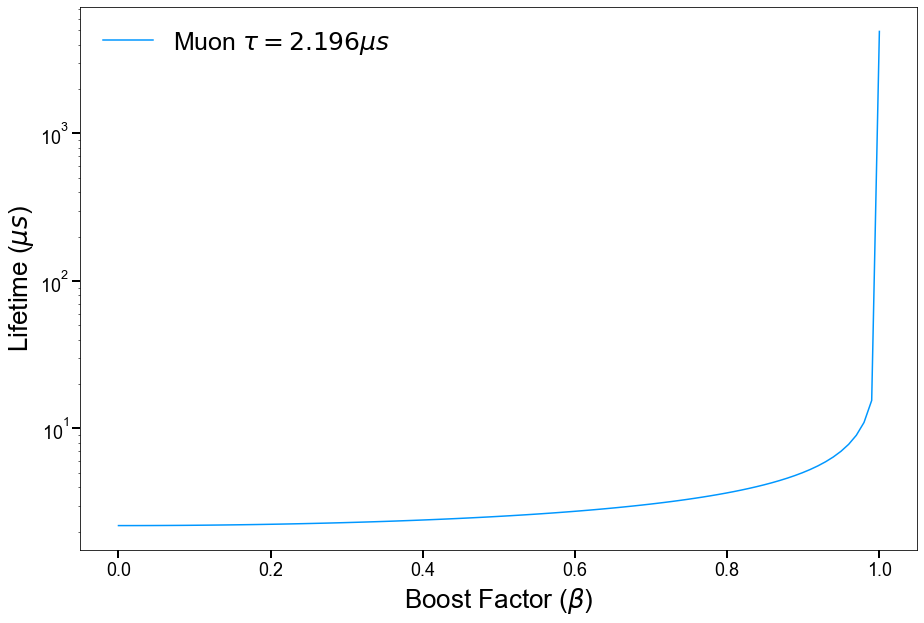

In [44]:
fig, ax = make_fig(xtitle="Boost Factor ($\\beta$)",ytitle="Lifetime ($\mu s$)")


mean_lifetime = 2.196# muon lifetime of 2.196 microseconds


betas = np.linspace(10**-8, 0.9999999, 100)
boosted_lifetimes = [time_dilation(dt=mean_lifetime, dx=0, beta = b) for b in betas]

ax.plot(betas, boosted_lifetimes, label="Muon $\\tau = 2.196 \mu s$", fillstyle='none',color='#0097FF',linestyle='solid')
ax.set_yscale("log")
ax.legend(fontsize=25, ncol=1, loc="upper left", facecolor='white', framealpha=0.8, edgecolor='None')

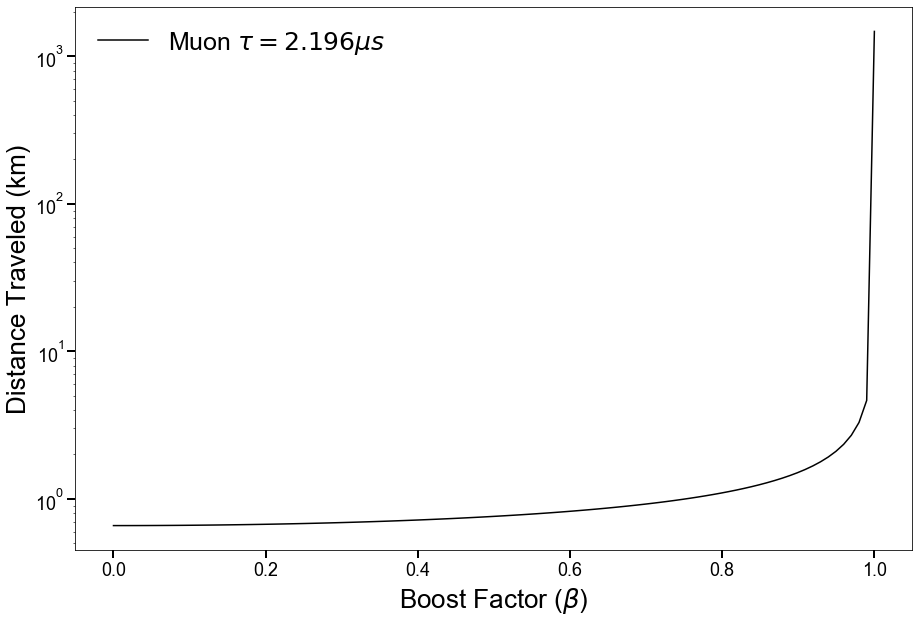

In [41]:
distance_traveled = np.array(boosted_lifetimes) * 10**-6 * c  / 1000 # [time (ms)] * [sec/ms] * [speed of light] * [km / m] = [meters]
fig, ax = make_fig(xtitle="Boost Factor ($\\beta$)",ytitle="Distance Traveled (km)")
ax.plot(betas, distance_traveled, label="Muon $\\tau = 2.196 \mu s$", fillstyle='none',color='black',linestyle='solid')
ax.set_yscale("log")
ax.legend(fontsize=25, ncol=1, loc="upper left", facecolor='white', framealpha=0.8, edgecolor='None')